In [1]:
import pandas as pd
import numpy as np

In [2]:
import statistics as st

In [3]:
dept=pd.read_csv('Department .csv')

In [4]:
dept_scheme=pd.read_csv('receipt_dept_mapping.csv')

In [5]:
scheme=pd.read_csv('receipt_schemes.csv')

In [6]:
missing_mapping=pd.read_excel('missing_mapping1_dept_code_updated.xlsx')

In [7]:
missing_mapping=missing_mapping[missing_mapping['major_head']<2000]

In [8]:
missing_mapping=missing_mapping.drop(['Unnamed: 0'],axis=1)

In [9]:
missing_mapping.drop(199,inplace=True)
missing_mapping.drop(116,inplace=True)

In [10]:
missing_mapping=missing_mapping.drop(['submajor_head','minor_head','subminor_head','sub_head'],axis=1)

In [11]:
missing_mapping.scheme_code=missing_mapping.scheme_code.astype(str)

In [12]:
missing_mapping.dept_code=missing_mapping.dept_code.astype(np.int64)

In [13]:
dept_scheme.scheme_code=dept_scheme.scheme_code.astype(str)

In [14]:
missing_mapping.scheme_code=missing_mapping.scheme_code.str.zfill(13)

In [15]:
dept_scheme.scheme_code=dept_scheme.scheme_code.str.zfill(13)

In [16]:
mheads1=[]
for i in dept_scheme['scheme_code']:
    mheads1.append(i[:4])
dept_scheme['major_head']=mheads1

In [17]:
#mheads2=[]
#for i in missing_mapping['scheme_code']:
#    mheads2.append(i[:4])
#missing_mapping['major_head']=mheads2

In [18]:
mapping=pd.concat([dept_scheme,missing_mapping]).reset_index(drop=True)

In [19]:
mapping.drop('major_head',axis=1,inplace=True)

In [16]:
missing_scheme=['403001051300',  '401001070500',   '70608000002',  '230001060600',
        '220001040100',  '210018000000', '1456008000200', '1456008000109',
        '210041040300',   '220601040100',  '406041010700']

In [17]:
missing_schemes=[]
for i in missing_scheme:
    i=i.zfill(13)
    missing_schemes.append(i)

In [18]:
other_scheme=pd.DataFrame({'dept_code':[1,2,27,9,9,9,12,12,15,21,13],
    'scheme_code':missing_schemes})

In [19]:
other_scheme

,dept_code,scheme_code
0,1,0403001051300
1,2,0401001070500
2,27,0070608000002
3,9,0230001060600
4,9,0220001040100
5,9,0210018000000
6,12,1456008000200
7,12,1456008000109
8,15,0210041040300
9,21,0220601040100


In [20]:
missing_scheme=pd.read_csv('missing_scheme_code.csv')

In [21]:
missing_scheme.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
missing_scheme.scheme_code=missing_scheme.scheme_code.astype(str)

In [23]:
missing_scheme['scheme_code']=missing_scheme['scheme_code'].str.zfill(13)

In [24]:
missing_scheme

,scheme_code,dept_code
0,403000000000.0,1
1,401000000000.0,2
2,70001010100.0,23
3,30038000400.0,9
4,230000000000.0,9
5,220000000000.0,9
6,210000000000.0,9
7,1460000000000.0,12
8,1460000000000.0,12
9,210000000000.0,9


In [25]:
list=['403000000000', '401000000000', '70001010100',
       '30038000400', '230000000000', '220000000000',
       '210000000000', '1460000000000', '70021010000',
       '221000000000', '40001030201', '40001030202',
       '40001100401', '42001030200', '42001040200', '40001030102',
       '40001100402', '42001030300', '406000000000',
       '42001040300', '45008000400', '45001010301']

In [26]:
missing_list=[]
for i in list:
    missing_list.append(i.zfill(13))

In [27]:
len(missing_list)

22

In [28]:
 list1=[1,2,23,9,9,9,9,12,27,9,9,9,9,9,9,9,9,9,13,9,9,9]
len(list1)

22

In [29]:
other_scheme1=pd.DataFrame({'scheme_code':missing_list,'dept_code':list1})

In [30]:
other_scheme=pd.concat([other_scheme,other_scheme1])

In [31]:
other_scheme.reset_index(drop=True,inplace=True)

In [32]:
other_scheme

,dept_code,scheme_code
0,1,0403001051300
1,2,0401001070500
2,27,0070608000002
3,9,0230001060600
4,9,0220001040100
5,9,0210018000000
6,12,1456008000200
7,12,1456008000109
8,15,0210041040300
9,21,0220601040100


In [35]:
dept_scheme=pd.concat([dept_scheme,other_scheme]).reset_index(drop=True)

In [48]:
dept_scheme.to_csv('dept_schemes.csv')

In [42]:
missing_mapping=missing_mapping.drop('major_head',axis=1)

In [47]:
missing_mapping.to_csv('missing_mappings.csv')

In [43]:
missing_mapping

,scheme_code,dept_code
0,0022001010100,2
1,0028001080100,9
2,0028001090100,9
3,0029001010100,36
4,0029001010200,36
...,...,...
278,1601048001300,47
279,1601048001400,47
280,1601048001500,47
281,1601048001600,47


In [45]:
mapping=pd.concat([dept_scheme,missing_mapping]).reset_index(drop=True)

In [46]:
mapping

,dept_code,scheme_code
0,1,0216017000700
1,1,0403001020100
2,1,0403001020200
3,1,0403001020300
4,1,0403001020400
...,...,...
1313,47,1601048001300
1314,47,1601048001400
1315,47,1601048001500
1316,47,1601048001600


In [41]:
mapping.to_csv('dept_map.csv')

In [38]:
data=pd.read_csv('original.csv')

In [39]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [40]:
data.scheme_code=data.scheme_code.astype(np.int64)

In [41]:
data=data[data.scheme_code < 2000000000000]

In [42]:
data.scheme_code=data.scheme_code.astype(str)

In [43]:
data.scheme_code=data.scheme_code.str.zfill(13)

In [44]:
majorheads=[]
for i in data['scheme_code']:
    majorheads.append(i[:4])
data['major_head']=majorheads

In [45]:
data[data.major_head=='1425']

,scheme_code,amount,tran_month,tran_year,major_head
772979,1425008000000,690.0,6.0,2017.0,1425


In [46]:
data.drop(772979,inplace=True)

In [47]:
data.reset_index(drop=True,inplace=True)

In [48]:
data

,scheme_code,amount,tran_month,tran_year,major_head
0,0055001040100,1500.0,1.0,2019.0,0055
1,0202016000100,150.0,1.0,2019.0,0202
2,0202016000100,150.0,1.0,2019.0,0202
3,0040001100101,22.0,1.0,2019.0,0040
4,0040001100101,17.0,1.0,2019.0,0040
...,...,...,...,...,...
1310671,0041001020200,7800.0,4.0,2022.0,0041
1310672,0040001030201,500.0,4.0,2022.0,0040
1310673,0041001020200,8500.0,4.0,2022.0,0041
1310674,0041001020200,4000.0,4.0,2022.0,0041


In [49]:
data=pd.merge(data,mapping,on='scheme_code',how='left')

In [50]:
data=pd.merge(data,dept,on='dept_code',how='left')

In [51]:
data

,scheme_code,amount,tran_month,tran_year,major_head,dept_code,dept_name
0,0055001040100,1500.0,1.0,2019.0,0055,18,Home (Police)
1,0202016000100,150.0,1.0,2019.0,0202,7,Education And Human Resources
2,0202016000100,150.0,1.0,2019.0,0202,7,Education And Human Resources
3,0040001100101,22.0,1.0,2019.0,0040,9,"Excise, Registration, Taxation And Stamps"
4,0040001100101,17.0,1.0,2019.0,0040,9,"Excise, Registration, Taxation And Stamps"
...,...,...,...,...,...,...,...
1310671,0041001020200,7800.0,4.0,2022.0,0041,43,Transport Department
1310672,0040001030201,500.0,4.0,2022.0,0040,9,"Excise, Registration, Taxation And Stamps"
1310673,0041001020200,8500.0,4.0,2022.0,0041,43,Transport Department
1310674,0041001020200,4000.0,4.0,2022.0,0041,43,Transport Department


In [52]:
data.to_csv('mapping_department.csv')

In [53]:
departments=data.dept_code.unique()

In [54]:
departments.sort()

In [55]:
year2017=data[(((data['tran_year']==2017) & (data['tran_month']>=4))  | ((data['tran_year']==2018) & (data['tran_month']<=3)))]
year2018=data[(((data['tran_year']==2018) & (data['tran_month']>=4))  | ((data['tran_year']==2019) & (data['tran_month']<=3)))]              
year2019=data[(((data['tran_year']==2019) & (data['tran_month']>=4))  | ((data['tran_year']==2020) & (data['tran_month']<=3)))]
year2020=data[(((data['tran_year']==2020) & (data['tran_month']>=4))  | ((data['tran_year']==2021) & (data['tran_month']<=3)))]
year2021=data[(((data['tran_year']==2021) & (data['tran_month']>=4))  | ((data['tran_year']==2022) & (data['tran_month']<=3)))]

In [56]:
amount17=pd.pivot_table(year2017,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount17.head()

,major_head,dept_code,amount
0,0403,1,18412191.0
1,0404,1,124360.0
2,0216,2,14244.0
3,0401,2,43323899.0
4,0435,2,1269602.0


In [57]:
amount18=pd.pivot_table(year2018,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount18.head()

,major_head,dept_code,amount
0,0403,1,20968601.0
1,0404,1,342360.0
2,0216,2,10123.0
3,0401,2,65808687.0
4,0435,2,2908439.0


In [58]:
amount19=pd.pivot_table(year2019,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount19.head()

,major_head,dept_code,amount
0,0403,1,19102408.0
1,0404,1,45660.0
2,0216,2,7891.0
3,0401,2,22936952.0
4,0435,2,3443178.0


In [59]:
amount20=pd.pivot_table(year2020,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount20.head()

,major_head,dept_code,amount
0,0403,1,19602020.0
1,0404,1,356325.0
2,0216,2,8346.0
3,0401,2,19822216.0
4,0435,2,2477821.0


In [60]:
amount21=pd.pivot_table(year2021,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount21.head()

,major_head,dept_code,amount
0,0216,1,800.0
1,0403,1,22023418.0
2,0404,1,166208.0
3,0216,2,8741.0
4,0401,2,25995195.0


In [61]:
import matplotlib.pyplot as plt

In [62]:
mh_of_17=amount17.dept_code.unique()
mh_of_18=amount18.dept_code.unique()
mh_of_19=amount19.dept_code.unique()
mh_of_20=amount20.dept_code.unique()
mh_of_21=amount21.dept_code.unique()

In [63]:
MajorHeads=(data.major_head.unique())
MajorHeads=MajorHeads.tolist()
color=['red','blue','skyblue','green','orange','brown','yellow','purple','grey','lightgreen','lightpink','whitesmoke','crimson','chocolate','chartreuse','chocolate','sandybrown','cornflowerblue','darksalmon','gainsboro','darkorange','coral','cadetblue','darkolivegreen','orange','hotpink','indigo','turquoise','mediumorchid','skyblue','wheat','teal','springgreen','slategray','skyblue','tan','darkslategray','powderblue','rosybrown','blueviolet','blanchedalmond','blueviolet','slateblue','yellow','plum','firebrick','khaki']

In [64]:
mc={'color': color,
    'MajorHead':MajorHeads}
color_codes=pd.DataFrame(mc)

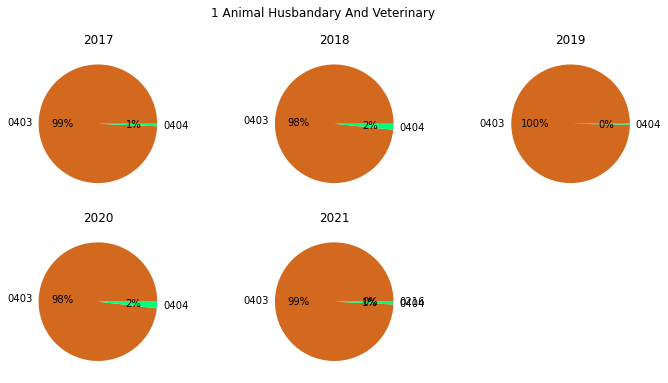

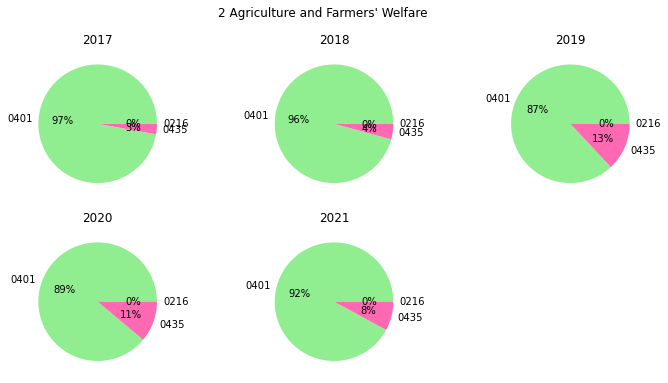

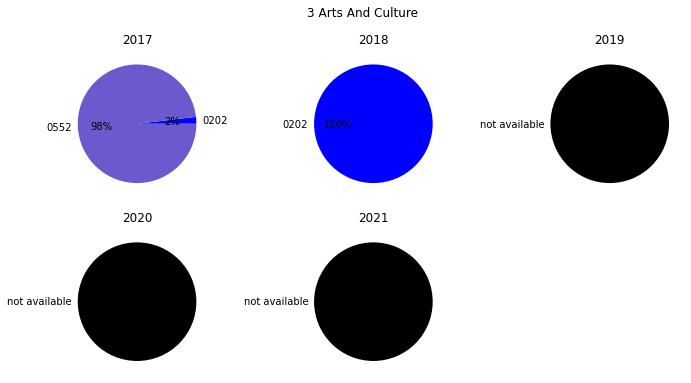

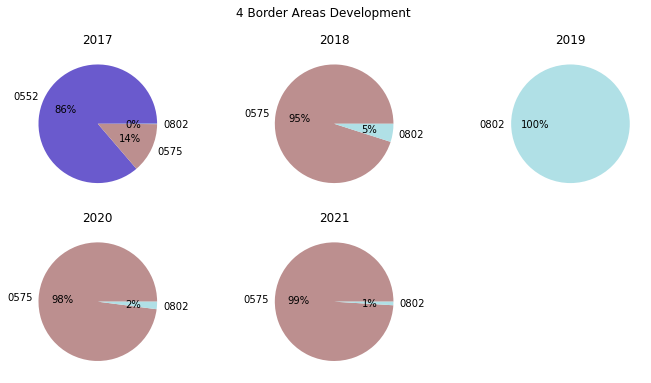

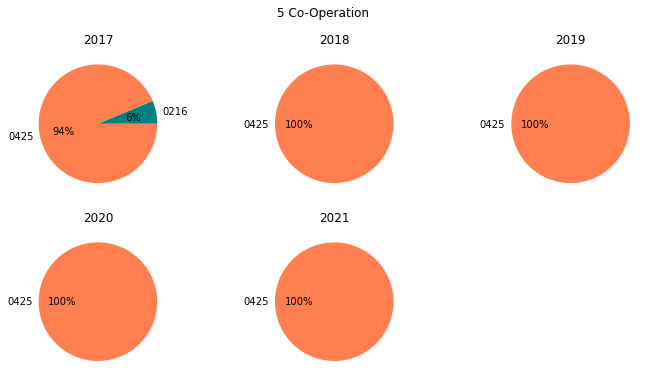

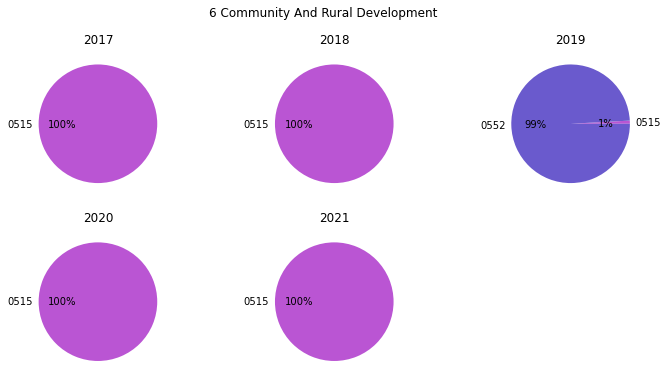

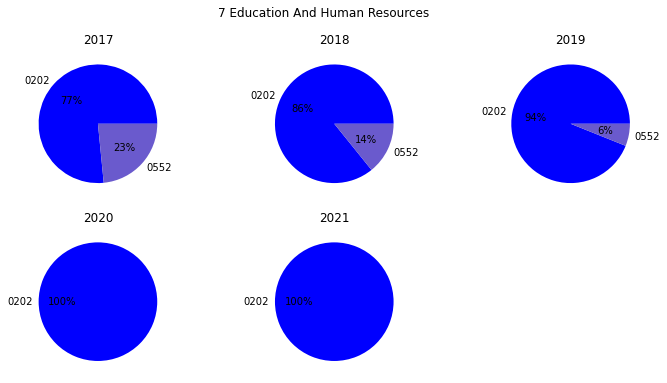

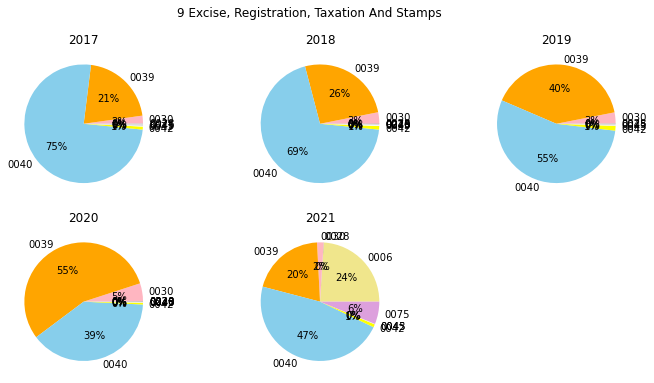

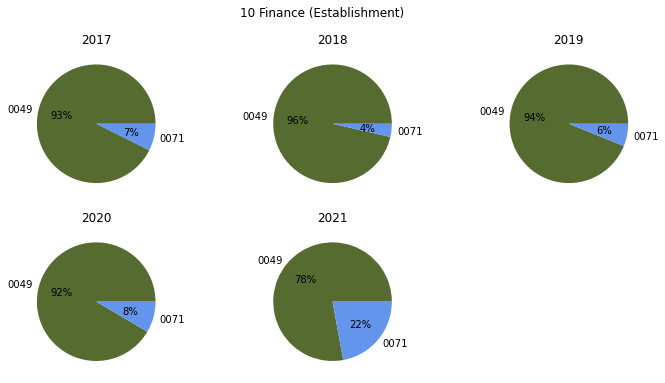

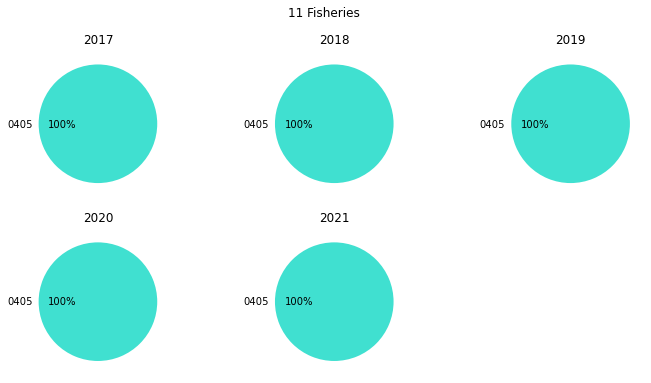

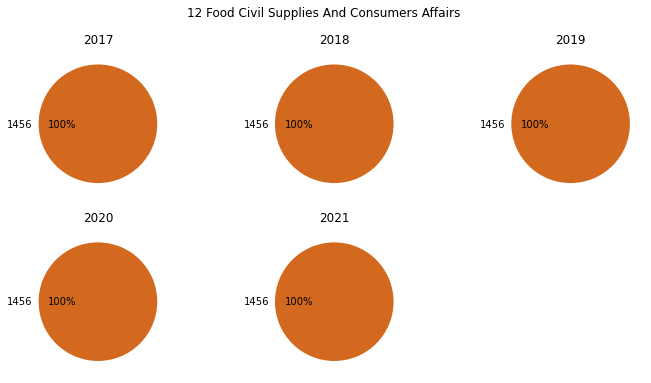

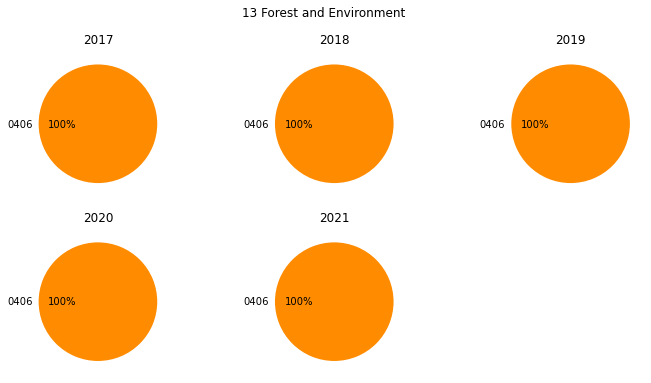

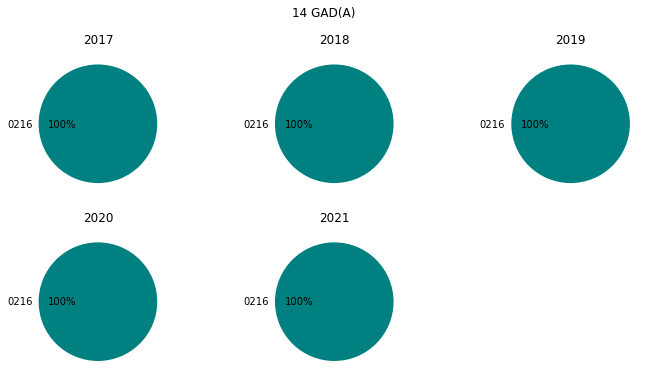

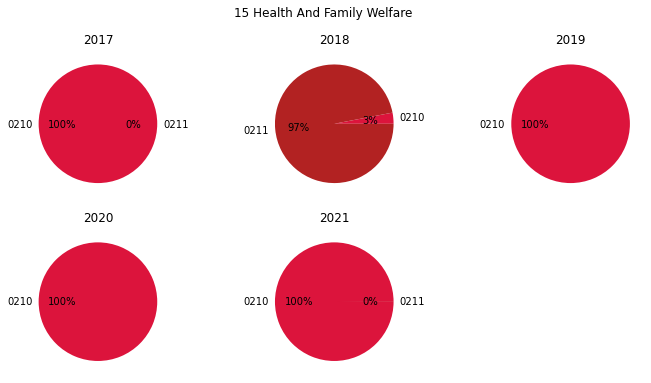

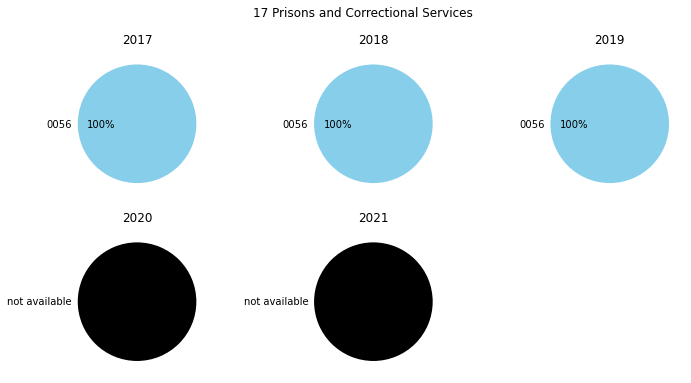

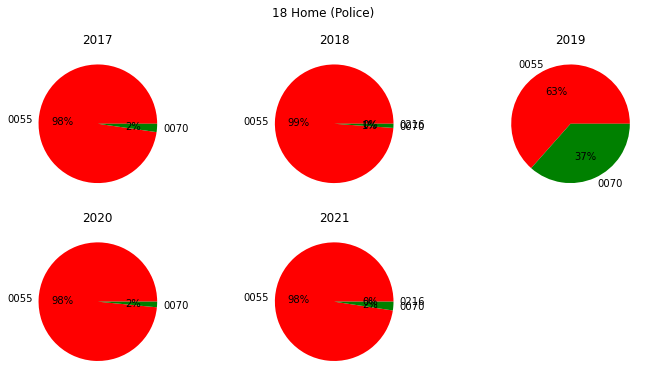

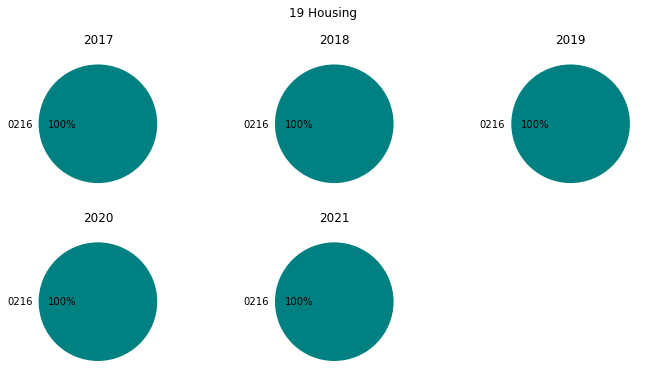

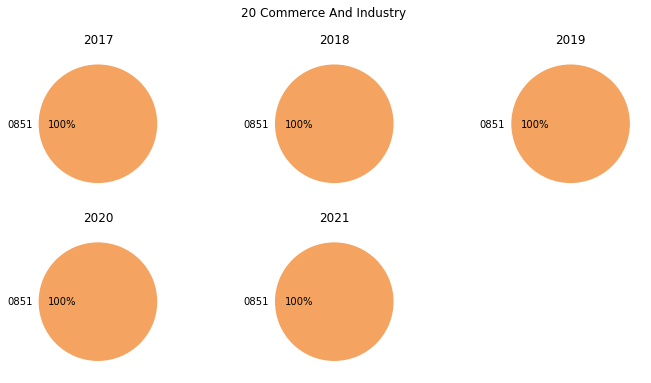

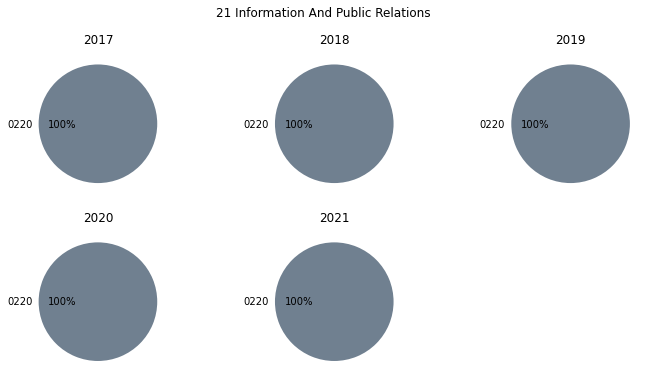

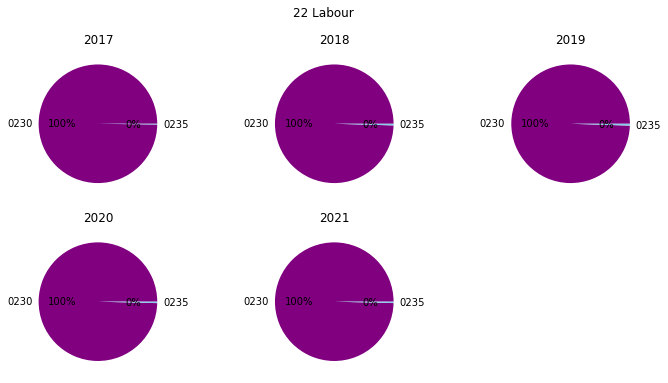

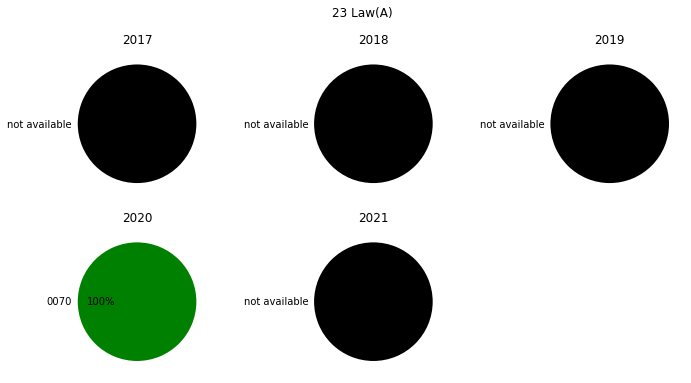

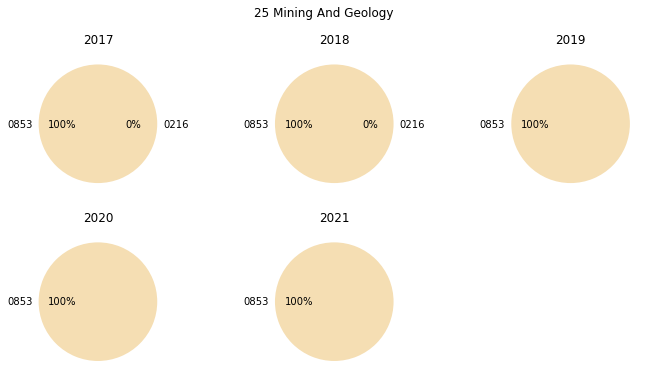

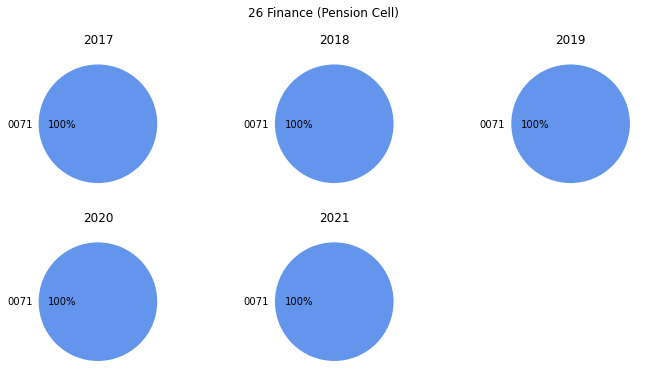

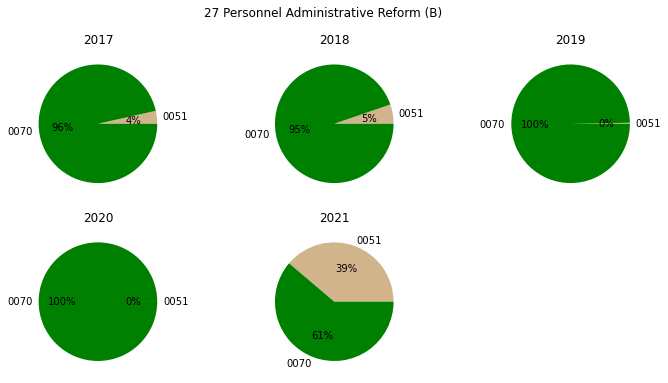

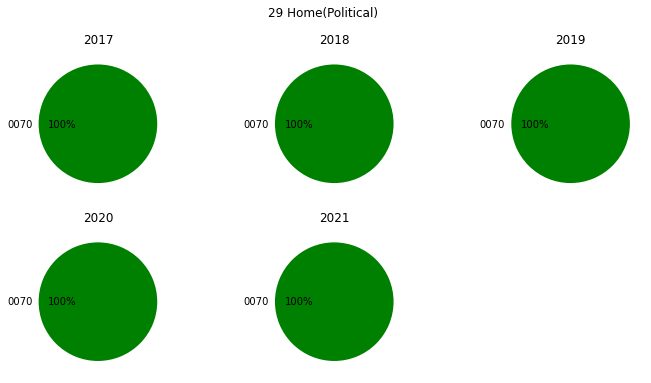

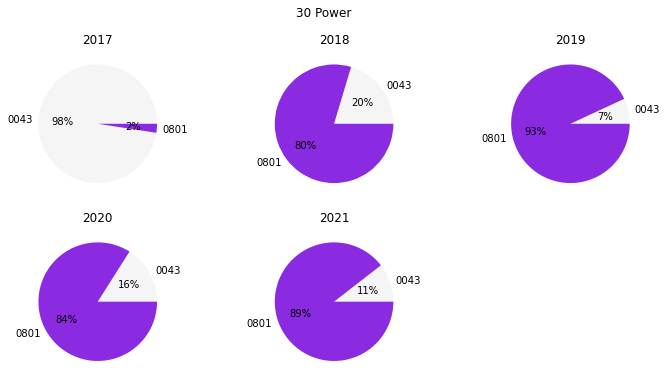

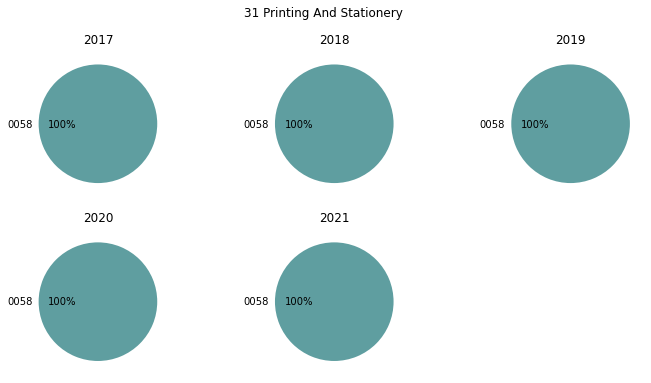

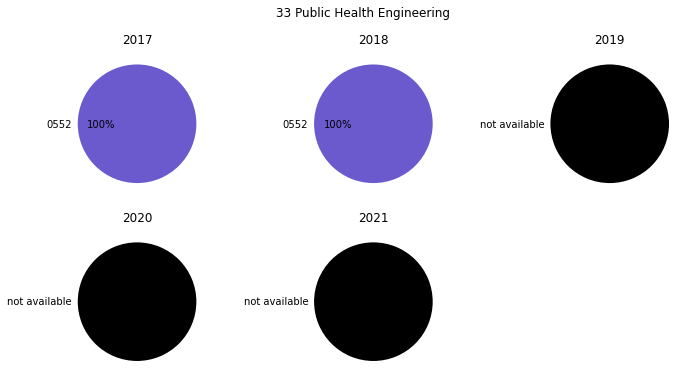

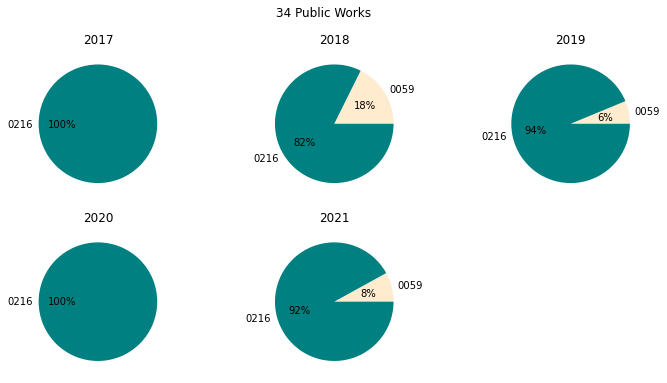

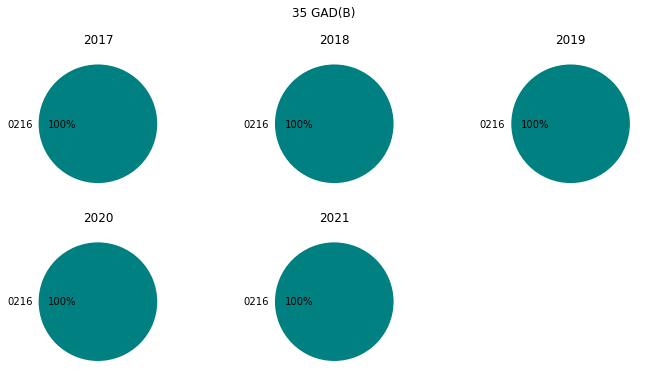

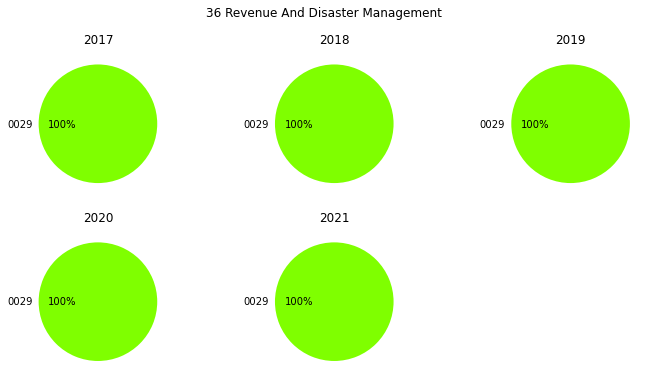

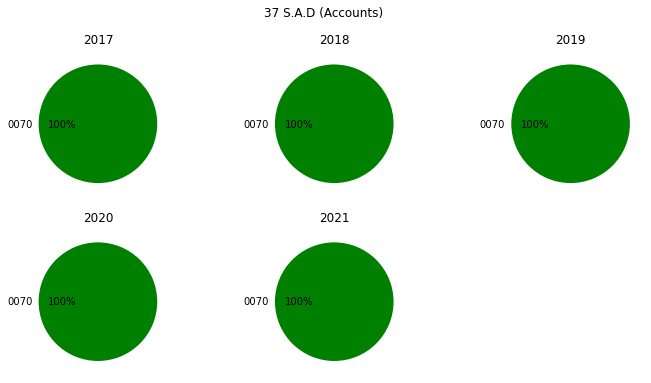

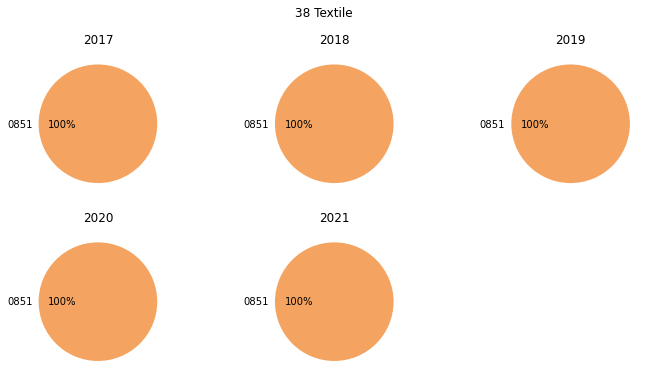

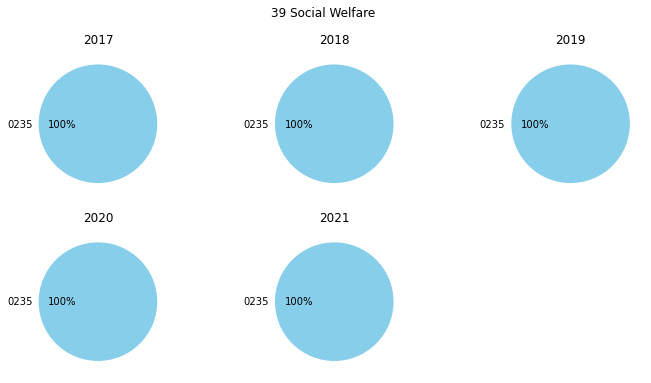

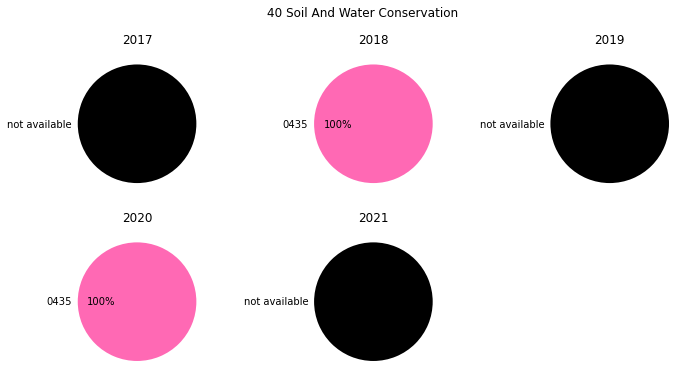

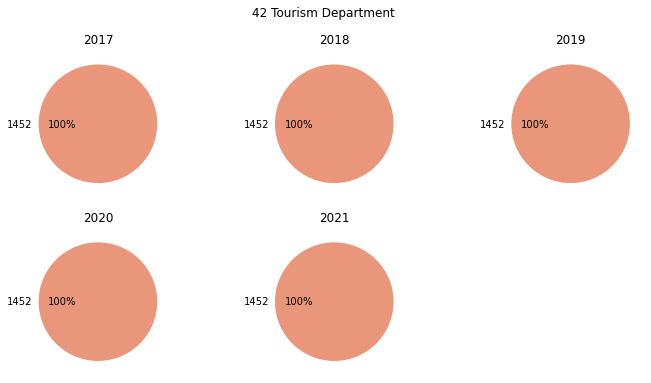

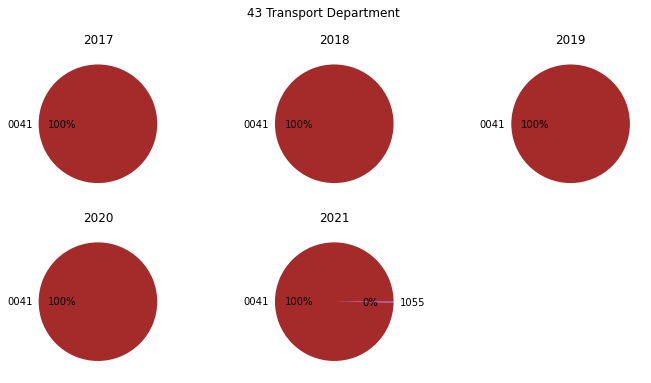

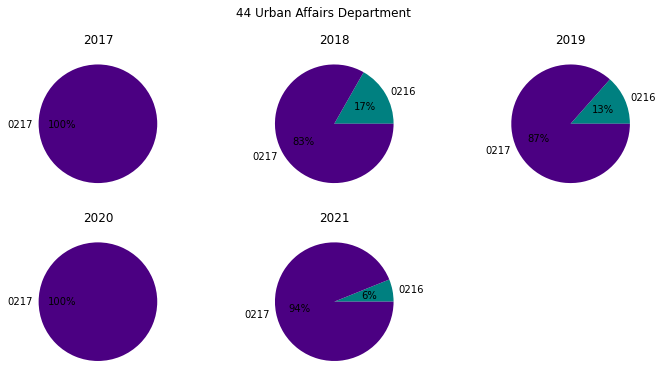

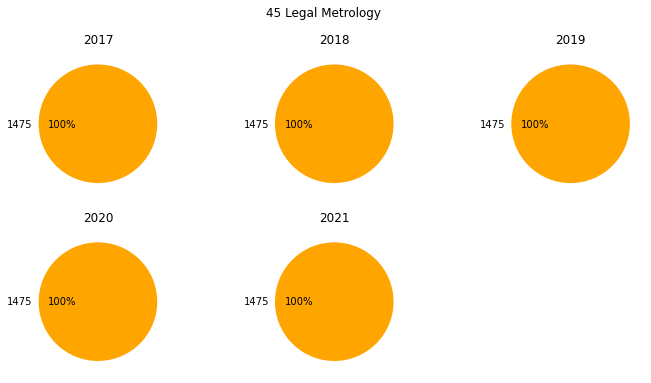

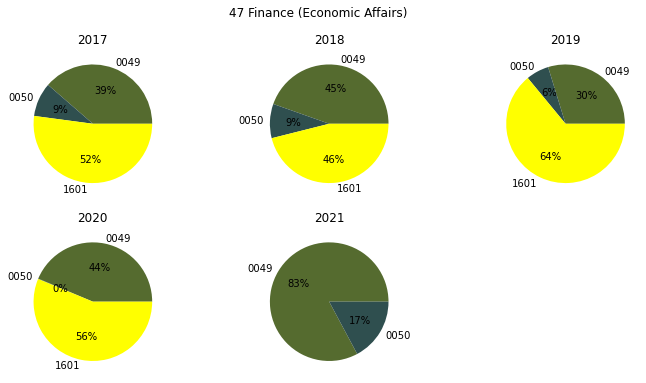

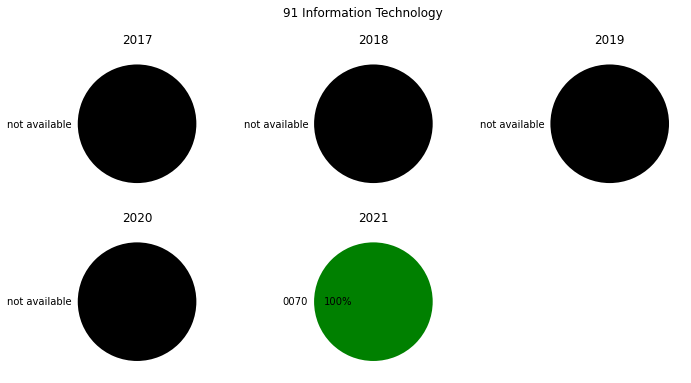

In [65]:

x=[100]
labels=['not available']

for i in departments:
    #print(str(dept.dept_name[dept.dept_code==i]).split('\n')[0])
    plt.figure(figsize=(12, 6))
    plt.suptitle(str(i)+' '+data.dept_name[data.dept_code==i].unique()[0])
    plt.subplot(2,3,1)
    if i in mh_of_17:
        plt.pie(amount17.amount[amount17['dept_code']==i],labels=amount17.major_head[amount17['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount17.major_head[amount17.dept_code==i]] ,autopct='%.0f%%')
        plt.title('2017')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2017')
    plt.subplot(2,3,2)
    if i in mh_of_18:
        plt.pie(amount18.amount[amount18['dept_code']==i],labels=amount18.major_head[amount18['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount18.major_head[amount18.dept_code==i]] ,autopct='%.0f%%')
        plt.title('2018')
    else: 
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2018')
    plt.subplot(2,3,3)
    if i in mh_of_19:
        plt.pie(amount19.amount[amount19['dept_code']==i],labels=amount19.major_head[amount19['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount19.major_head[amount19.dept_code==i]] ,autopct='%.0f%%')
        plt.title('2019')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2019')
    plt.subplot(2,3,4)
    if i in mh_of_20:
        plt.pie(amount20.amount[amount20['dept_code']==i],labels=amount20.major_head[amount20['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount20.major_head[amount20.dept_code==i]] ,autopct='%.0f%%')
        plt.title('2020')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2020')
    
    plt.subplot(2,3,5)
    if i in mh_of_21:
        plt.pie(amount21.amount[amount21['dept_code']==i],labels=amount21.major_head[amount21['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount21.major_head[amount21.dept_code==i]] ,autopct='%.0f%%')
        plt.title('2021')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2021')
    plt.show()

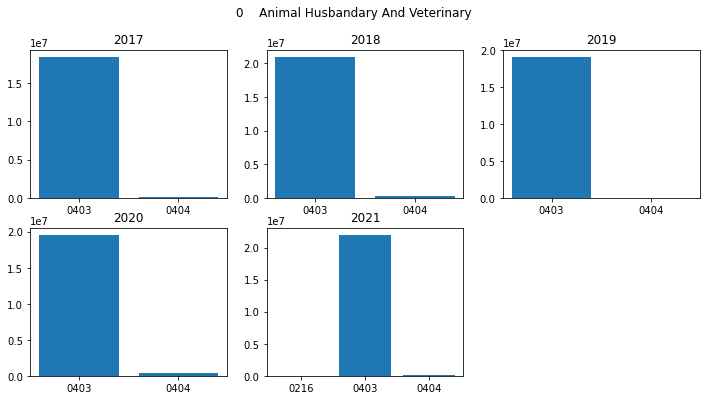

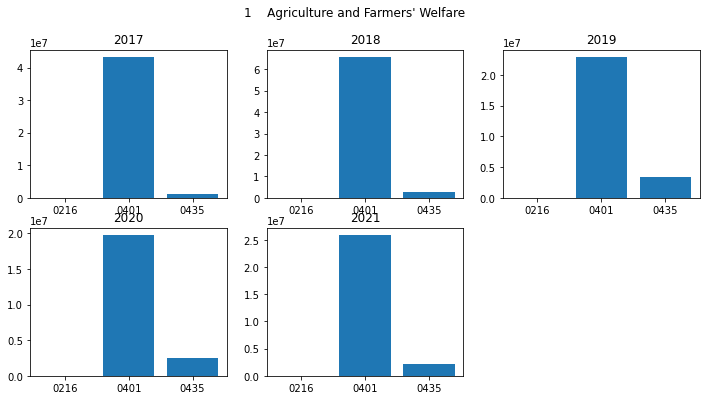

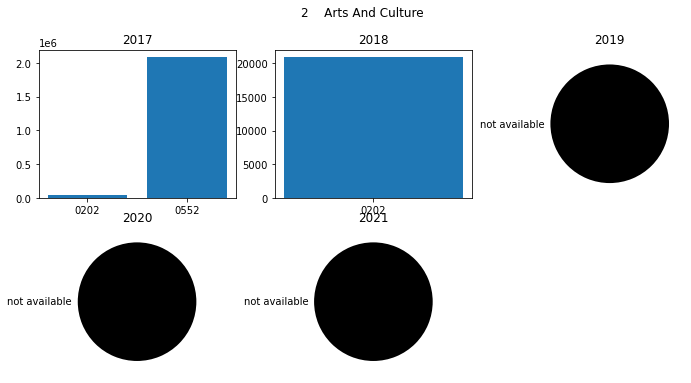

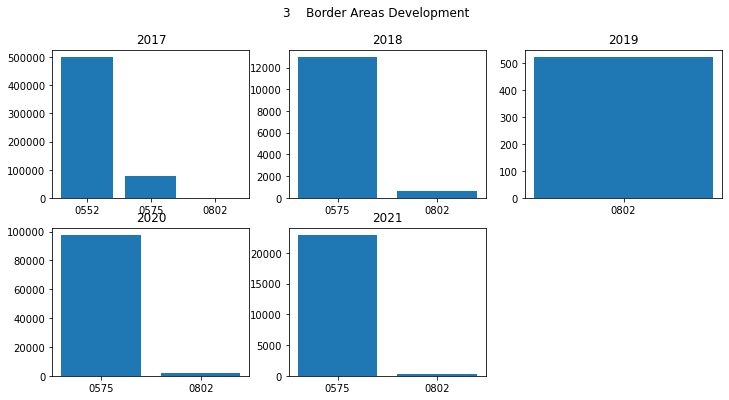

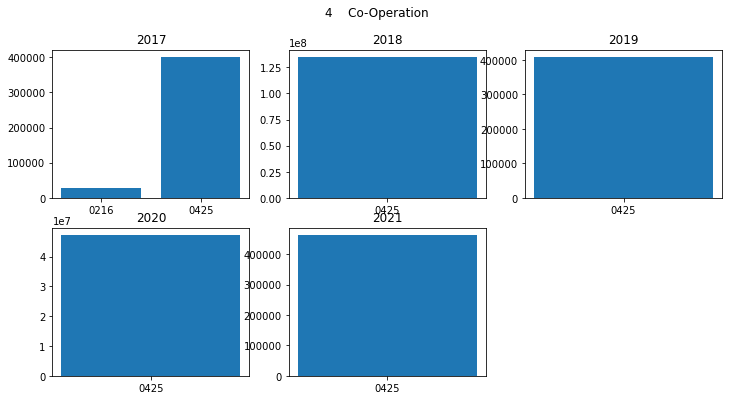

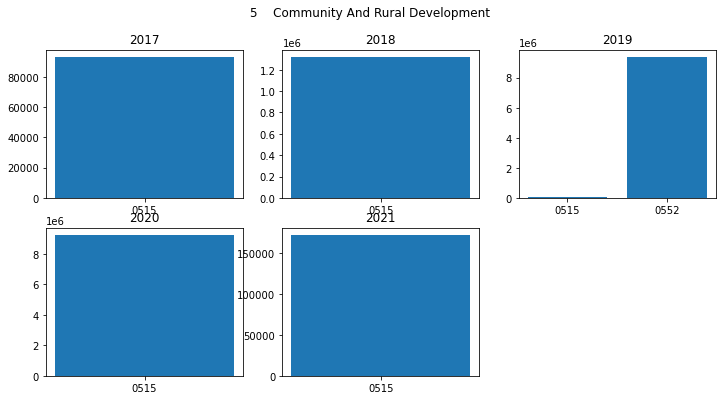

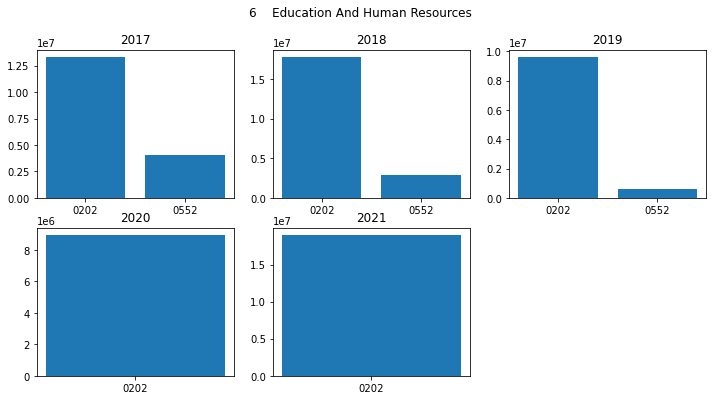

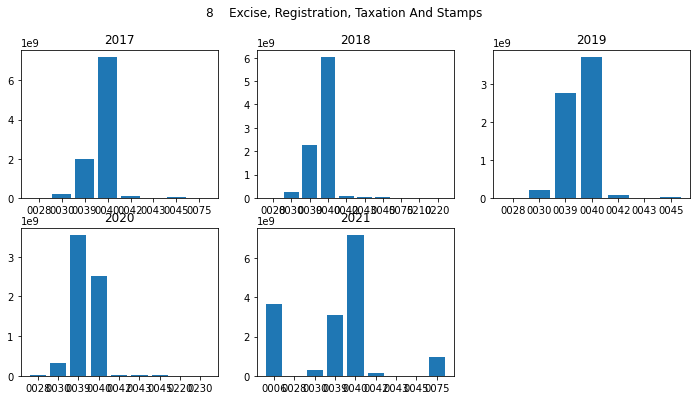

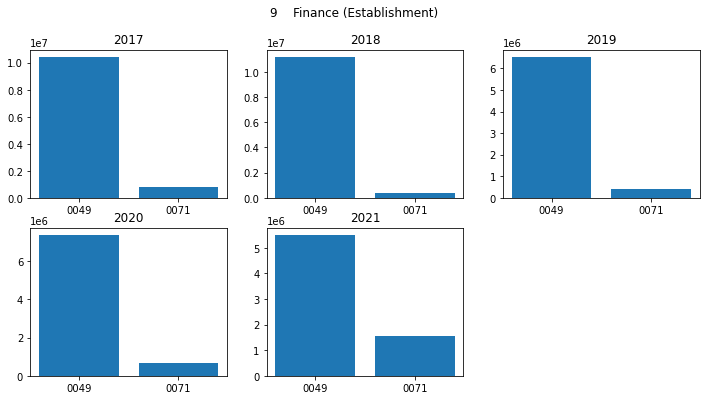

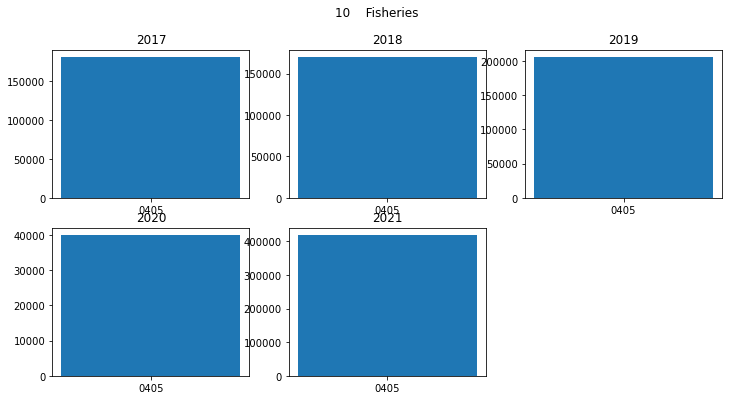

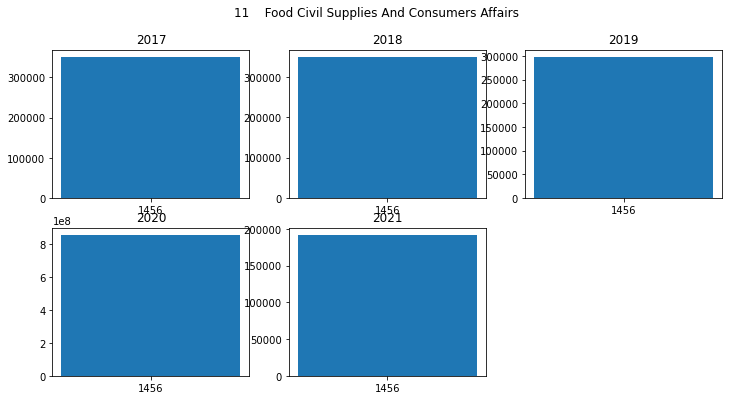

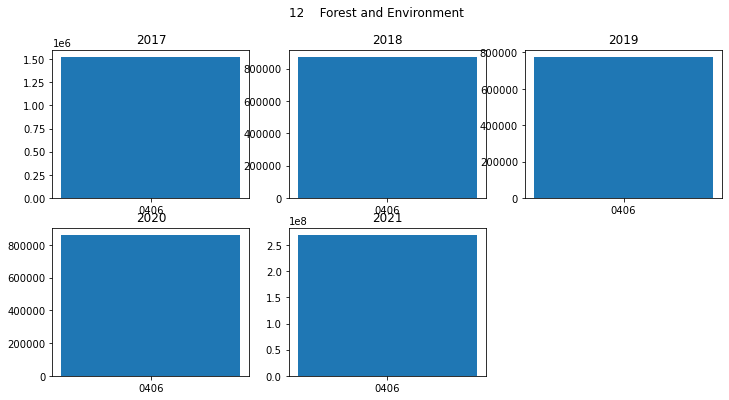

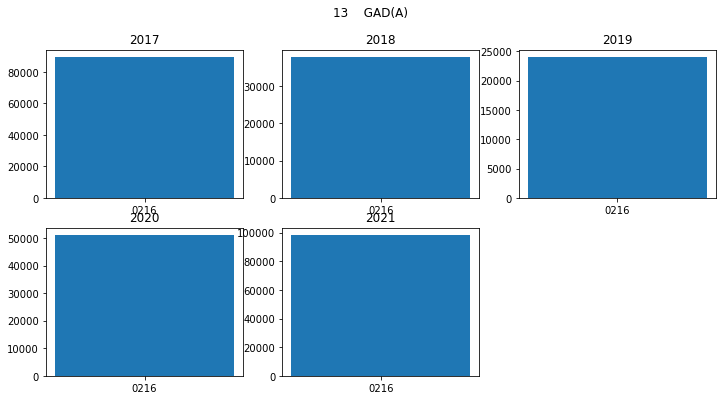

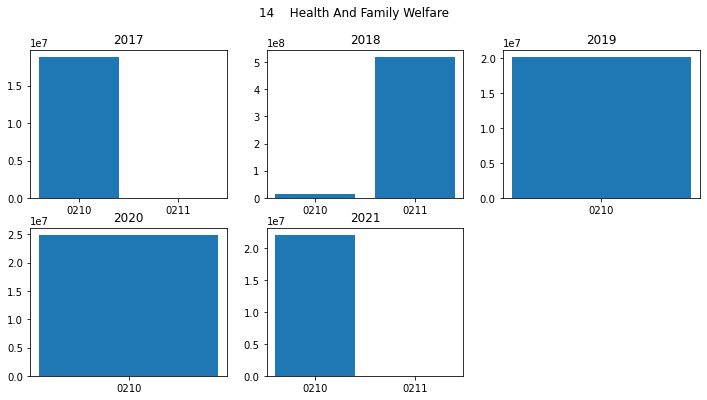

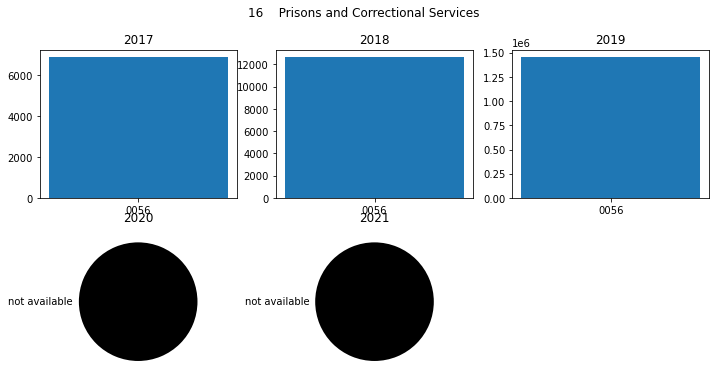

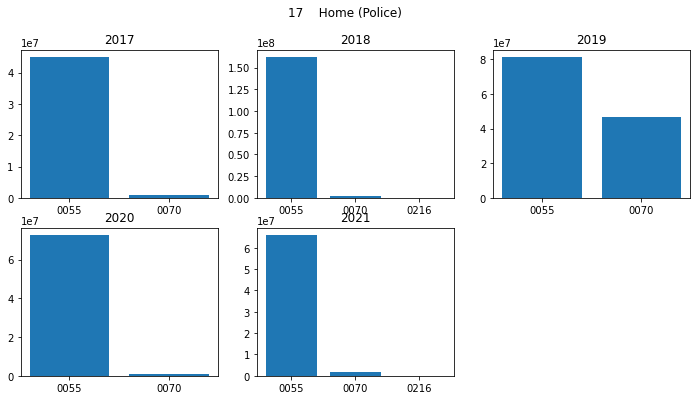

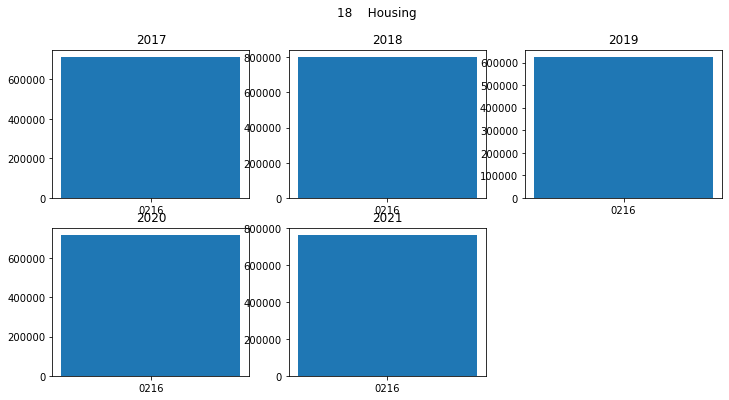

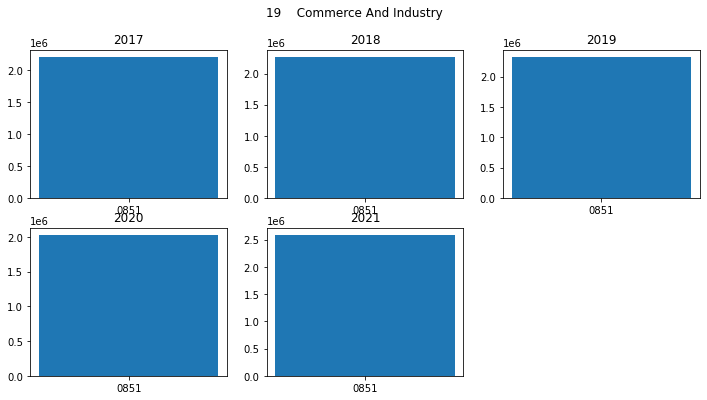

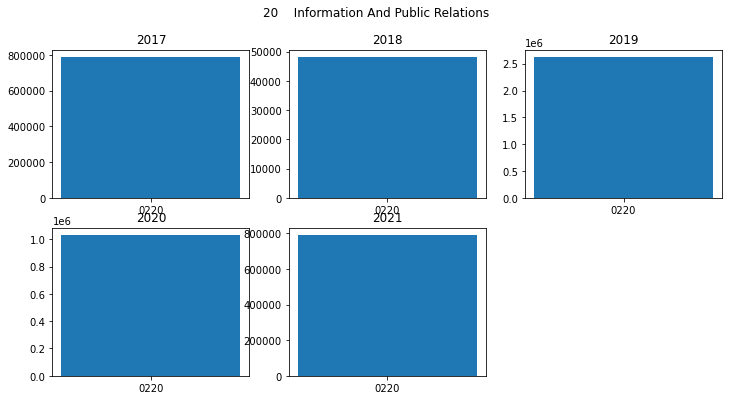

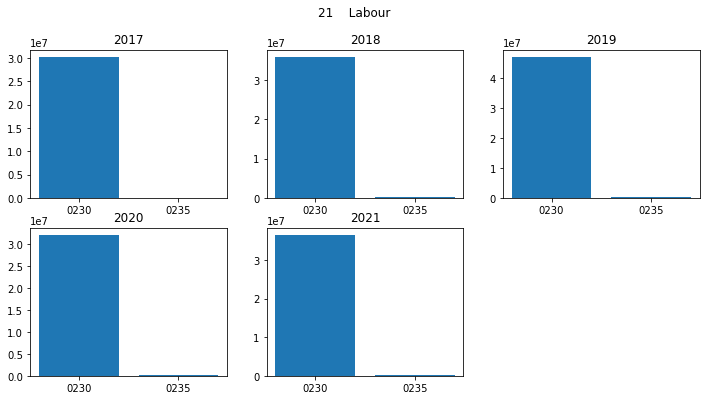

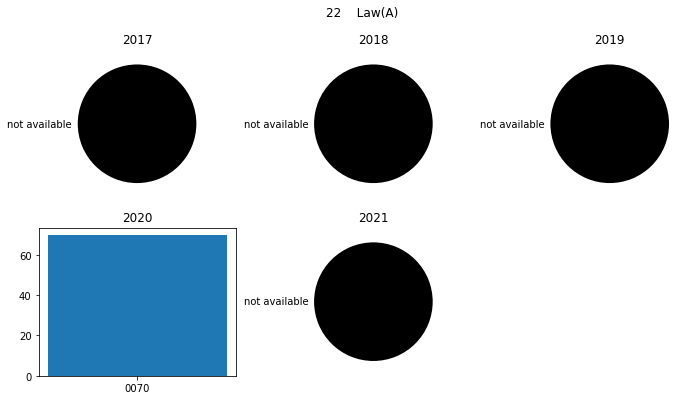

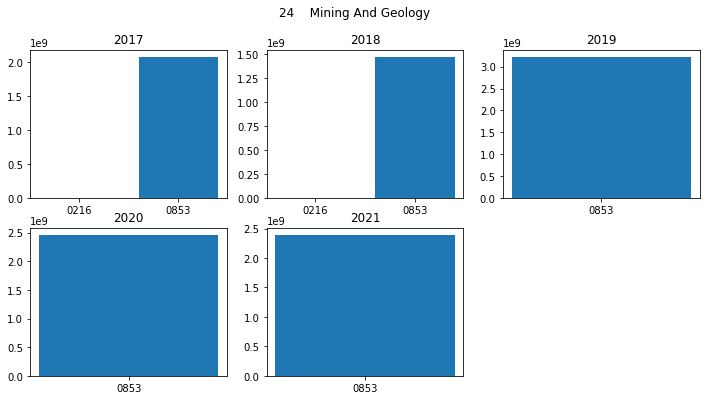

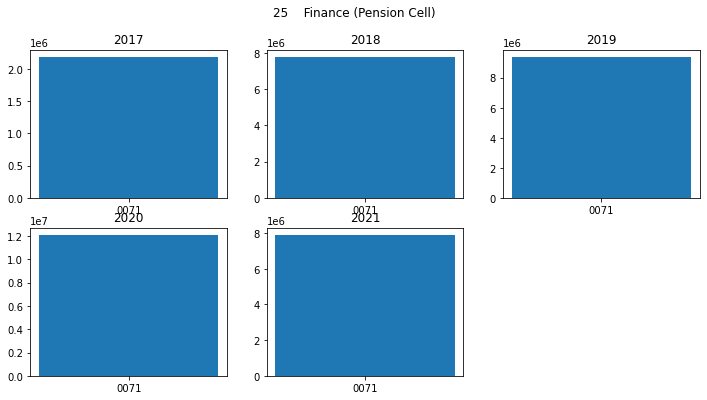

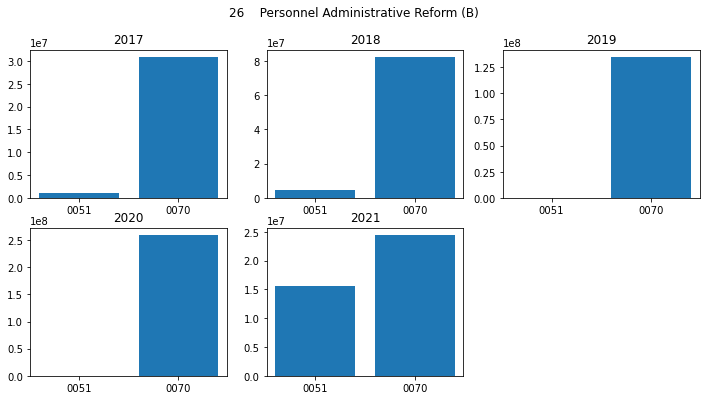

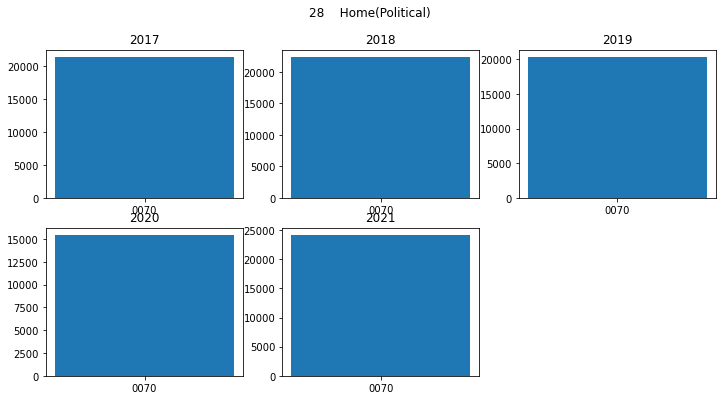

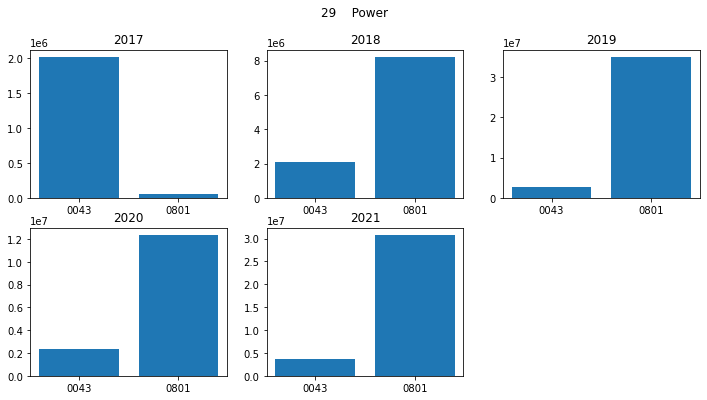

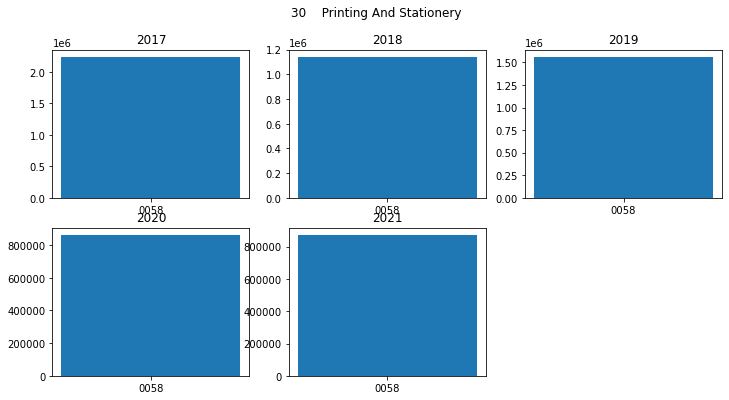

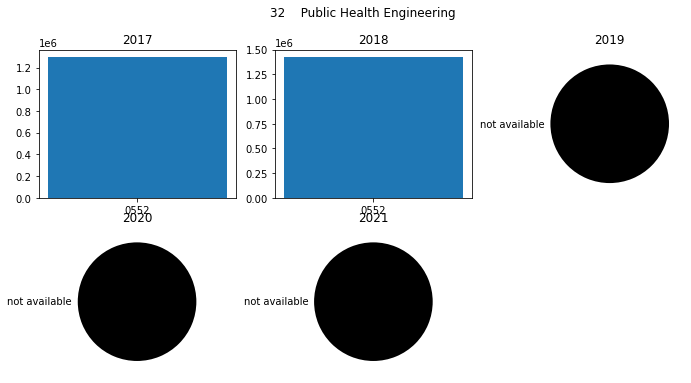

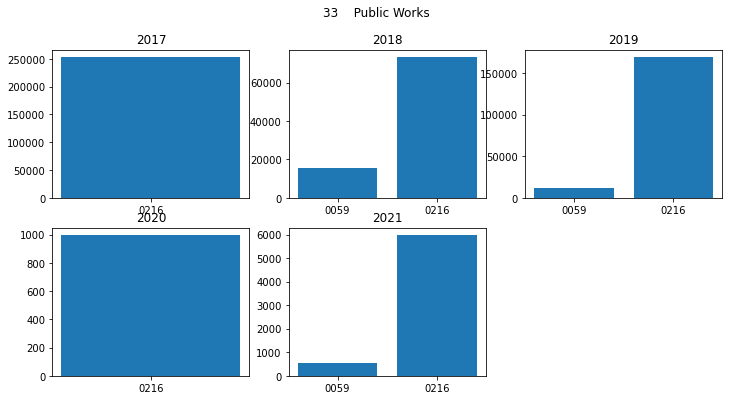

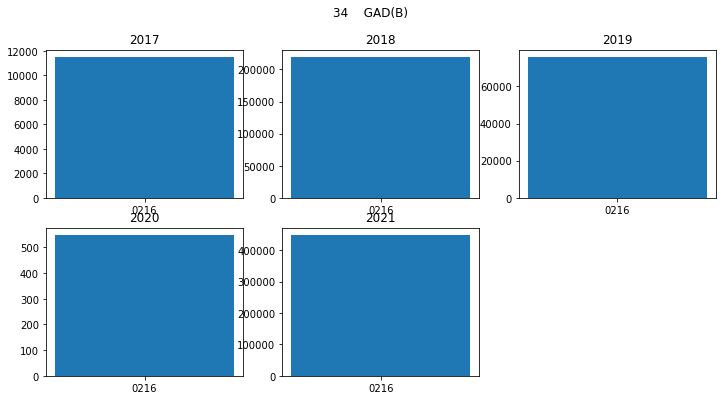

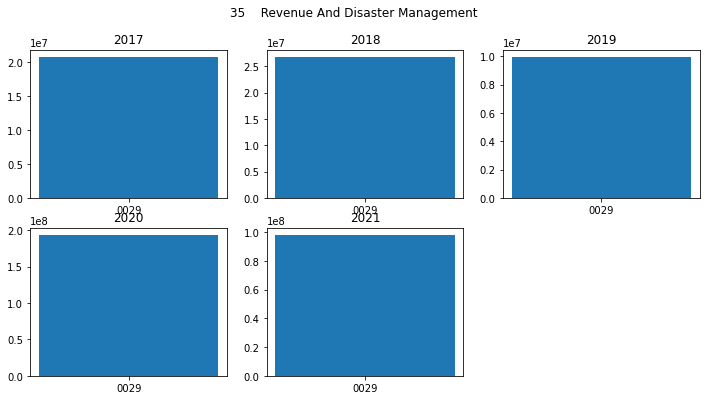

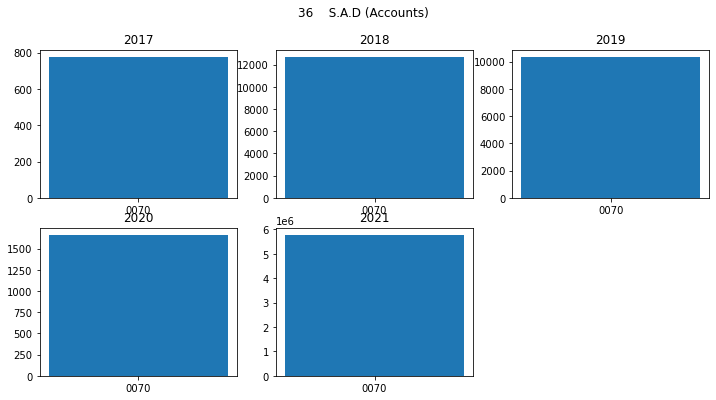

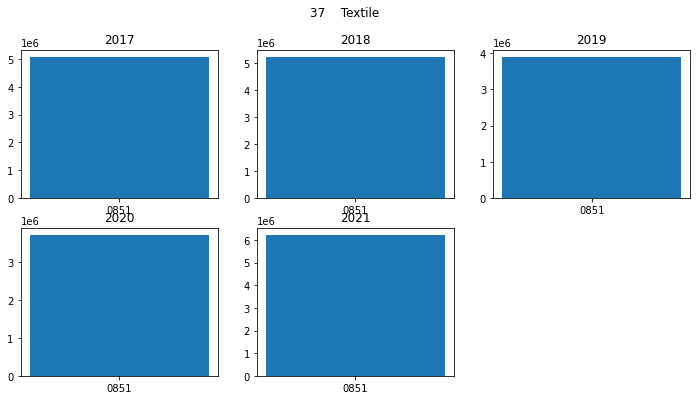

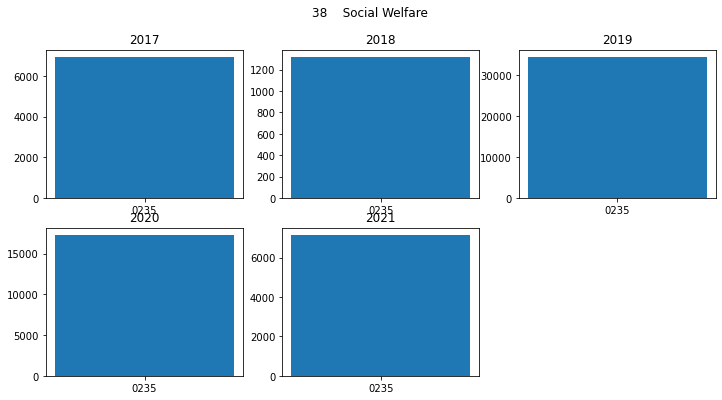

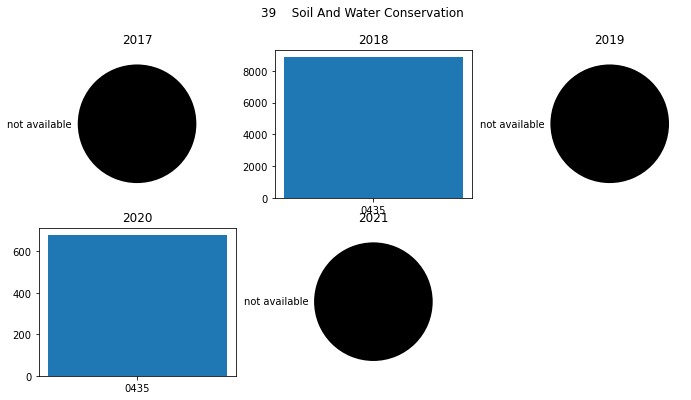

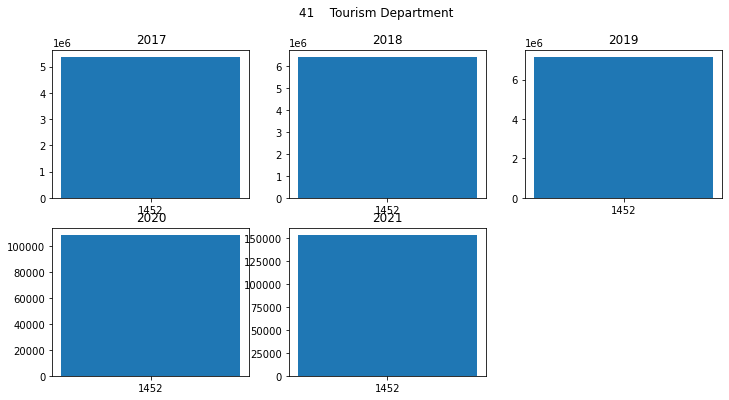

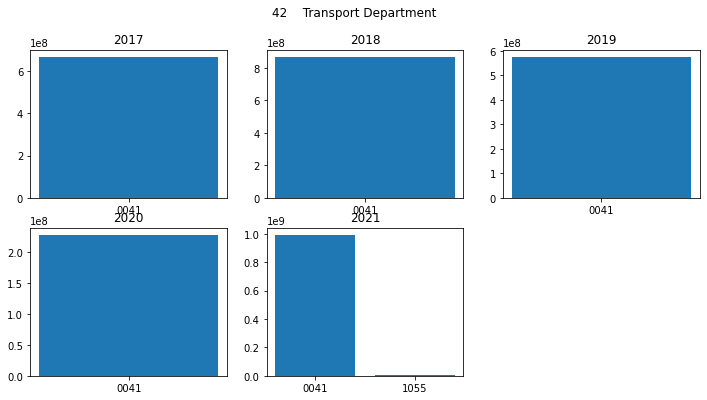

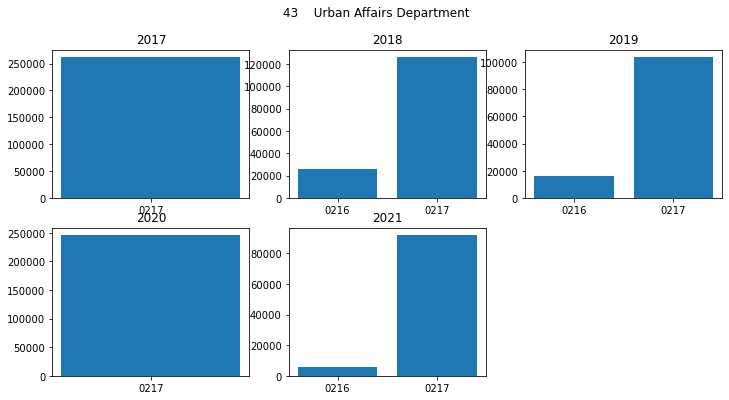

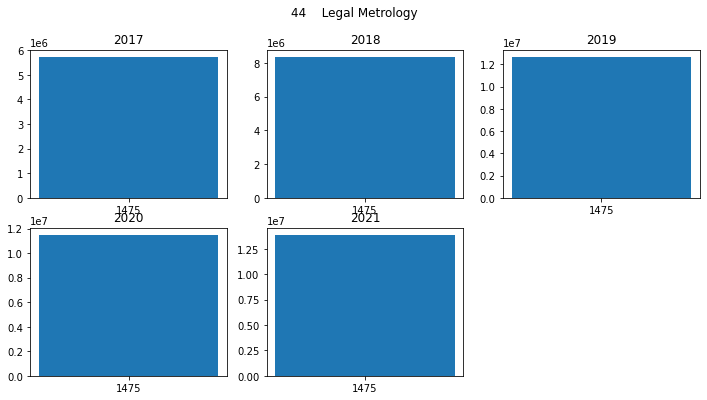

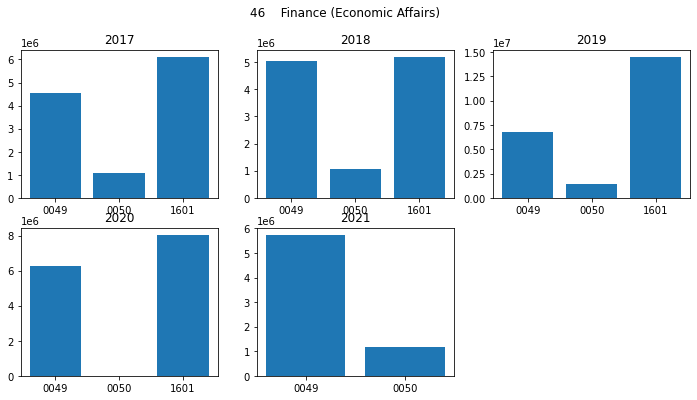

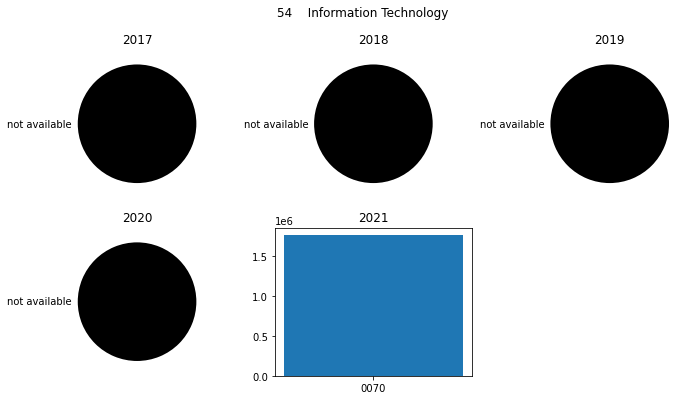

In [66]:

x=[100]
labels=['not available']

for i in departments:
#     print(str(dept.dept_name[dept.dept_code==i]).split('\n')[0])
    plt.figure(figsize=(12, 6))
    plt.suptitle(str(dept.dept_name[dept.dept_code==i]).split('\n')[0])
    plt.subplot(2,3,1)
    if i in mh_of_17:
        plt.bar(amount17.major_head[amount17['dept_code']==i],amount17.amount[amount17['dept_code']==i])
        plt.title('2017')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2017')
    plt.subplot(2,3,2)
    if i in mh_of_18:
        plt.bar(amount18.major_head[amount18['dept_code']==i],amount18.amount[amount18['dept_code']==i],)
        plt.title('2018')
    else: 
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2018')
    plt.subplot(2,3,3)
    if i in mh_of_19:
        plt.bar(amount19.major_head[amount19['dept_code']==i],amount19.amount[amount19['dept_code']==i])
        plt.title('2019')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2019')
    plt.subplot(2,3,4)
    if i in mh_of_20:
        plt.bar(amount20.major_head[amount20['dept_code']==i],amount20.amount[amount20['dept_code']==i])
        plt.title('2020')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2020')
    
    plt.subplot(2,3,5)
    if i in mh_of_21:
        plt.bar(amount21.major_head[amount21['dept_code']==i],amount21.amount[amount21['dept_code']==i])
        plt.title('2021')
    else:
        plt.pie(x,labels=labels,colors=['black'])
        plt.title('2021')
    plt.show()

In [67]:
dept_codes=data.dept_code.unique()

In [68]:
dept_codes.sort()

In [69]:
dept_amount_2017=pd.pivot_table(amount17,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2018=pd.pivot_table(amount18,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2019=pd.pivot_table(amount19,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2020=pd.pivot_table(amount20,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2021=pd.pivot_table(amount21,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)

In [70]:
dept_codes_amount=[[]for i in dept_codes]



In [71]:
for i in range(len(dept_codes_amount)):
    if dept_codes[i] not in year2017.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2017.amount[dept_amount_2017['dept_code']==dept_codes[i]]))
        
    if dept_codes[i] not in year2018.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2018.amount[dept_amount_2018['dept_code']==dept_codes[i]]))
        
    if dept_codes[i] not in year2019.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2019.amount[dept_amount_2019['dept_code']==dept_codes[i]]))
        
    if dept_codes[i] not in year2020.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2020.amount[dept_amount_2020['dept_code']==dept_codes[i]]))
        
    if dept_codes[i] not in year2021.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2021.amount[dept_amount_2021['dept_code']==dept_codes[i]]))
        
        
        
    

In [72]:
 dept_codes_amount
    

[[18536551.0, 21310961.0, 19148068.0, 19958345.0, 22190426.0],
 [44607745.0, 68727249.0, 26388021.0, 22308383.0, 28238018.0],
 [2129400.0, 21000.0, 0, 0, 0],
 [581325.0, 13675.0, 525.0, 99875.0, 23225.0],
 [428555.0, 135094013.0, 408850.0, 47356306.0, 464259.0],
 [93410.0, 1322469.0, 9481050.0, 9260010.0, 173000.0],
 [17443187.0, 20744707.0, 10244122.0, 8972477.0, 19031793.0],
 [9567685169.25, 8719308094.74, 6827954775.0, 6444469105.75, 15308452420.0],
 [11273958.0, 11610761.0, 6966014.0, 8067283.0, 7078235.0],
 [181860.0, 170270.0, 205950.0, 40050.0, 419642.0],
 [351675.0, 349776.0, 298280.0, 859995016.0, 192135.0],
 [1526346.0, 873477.0, 776222.0, 862742.0, 270310036.0],
 [89637.0, 37832.0, 24068.0, 51270.0, 98660.0],
 [18883738.0, 536067142.0, 20177517.0, 24974702.0, 22083887.0],
 [6900.0, 12700.0, 1459075.0, 0, 0],
 [46078097.0, 164498948.0, 128419580.0, 73987240.0, 67811619.0],
 [714062.0, 803490.0, 626237.0, 719752.0, 764600.0],
 [2214432.0, 2272788.0, 2328521.0, 2034911.0, 25906

In [73]:
years=[2017,2018,2019,2020,2021]

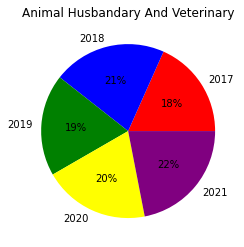

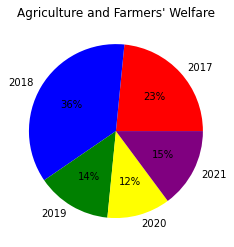

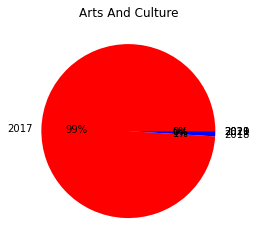

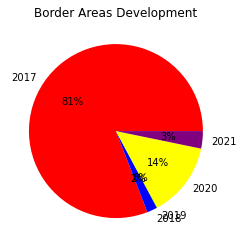

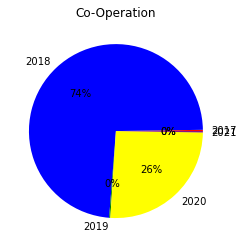

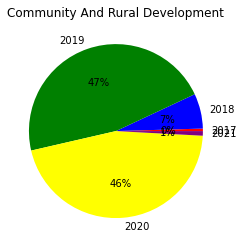

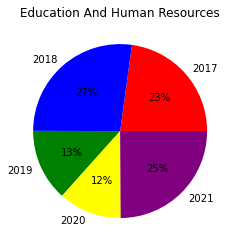

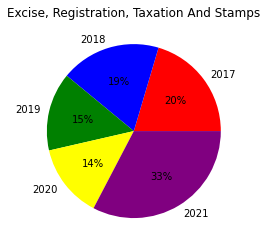

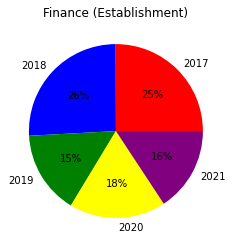

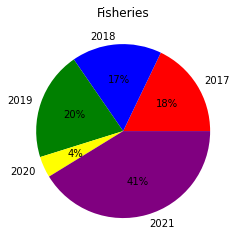

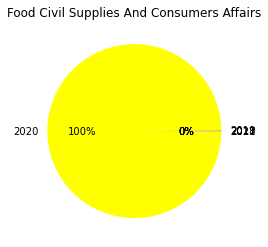

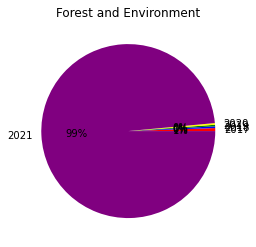

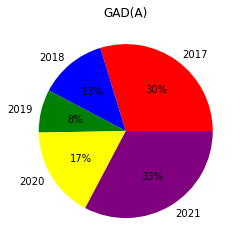

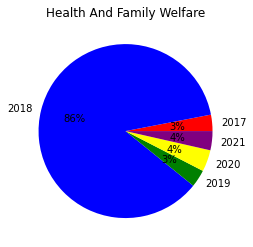

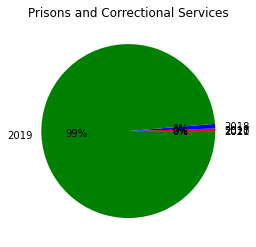

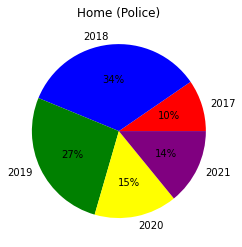

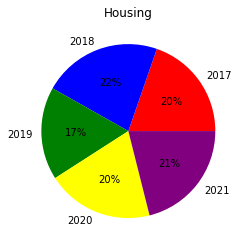

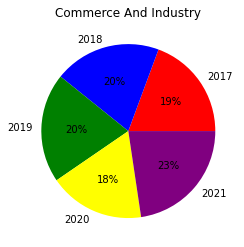

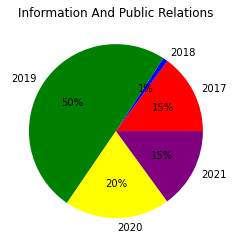

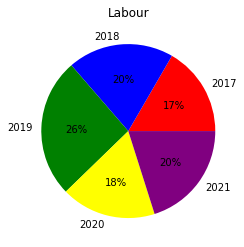

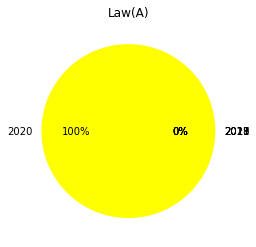

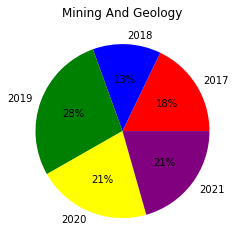

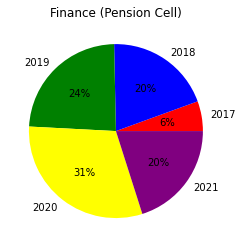

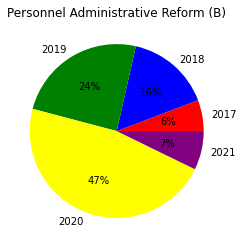

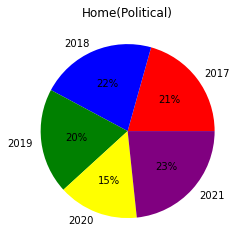

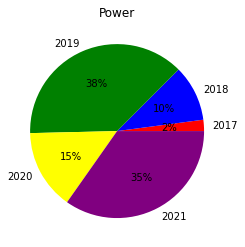

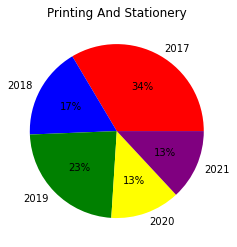

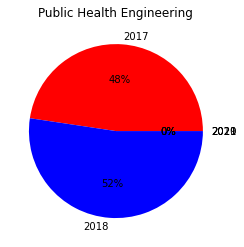

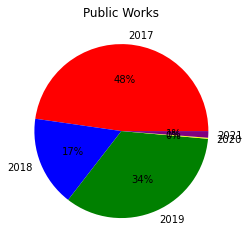

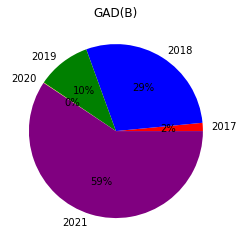

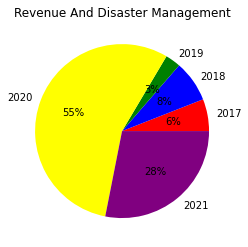

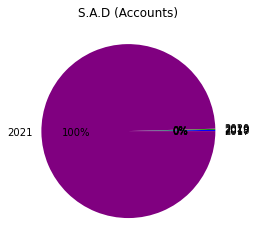

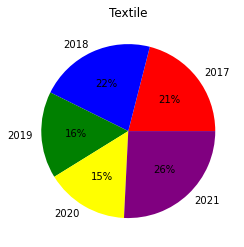

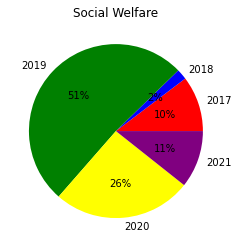

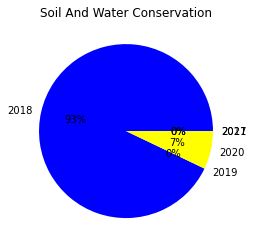

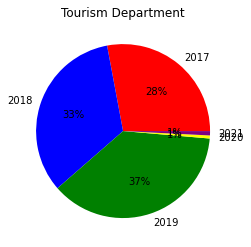

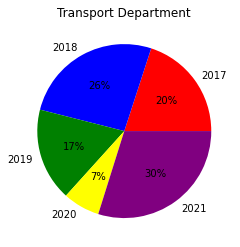

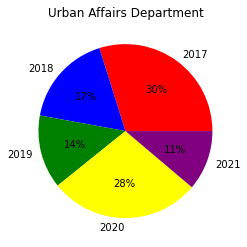

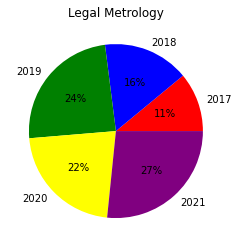

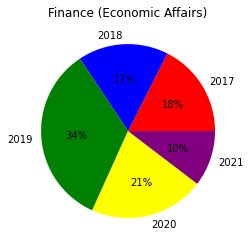

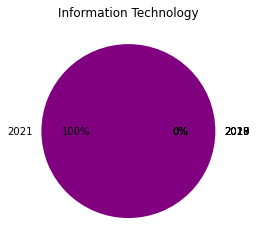

In [74]:
for i in range(len(dept_codes_amount)):
    plt.pie(dept_codes_amount[i],labels=years,colors=['red','blue','green','yellow','purple'],autopct='%.0f%%')
    plt.title(data.dept_name[data.dept_code==dept_codes[i]].unique()[0])
    plt.show()

In [75]:
data.dept_name[data.dept_code==2].unique()[0]

"Agriculture and Farmers' Welfare"

In [76]:
predicted_amount_dept=[]

def dept_algorithims(a,b,c,d,e):    
       
        if (((b>0) & (c>0) & (d>0)&(e>0))& (((a+b+c+d+e)/5)>st.median([a,b,c,d,e]))):
            difference=(((c-b)*100/b)+((d-c)*100/c)+((e-d)*100/d))/3
            prediction=e+((e*(difference))/100)
            predicted_amount_dept.append(prediction)
            print('predicted amount for dept '+data.dept_name[data.dept_code==dept_codes[i]].unique()[0]+' is ',prediction)
        else:
            difference=((b-a)+(c-b)+(d-c)+(e-d))/4
            prediction=e+difference
            if prediction>0:
                print('predicted amount for dept '+data.dept_name[data.dept_code==dept_codes[i]].unique()[0]+' is ',prediction)
                predicted_amount_dept.append(prediction)
            else:    
                prediction=(a+b+c+d+e)/5
                print('predicted amount for dept '+data.dept_name[data.dept_code==dept_codes[i]].unique()[0]+' is ',prediction)
                predicted_amount_dept.append(prediction)
                
for i in range(len(dept_codes_amount)):
    a2=float(dept_codes_amount[i][0])
    b2=float(dept_codes_amount[i][1])
    c2=float(dept_codes_amount[i][2])
    d2=float(dept_codes_amount[i][3])
    e2=float(dept_codes_amount[i][4])
    dept_algorithims(a2,b2,c2,d2,e2)

predicted amount for dept Animal Husbandary And Veterinary is  22579951.69452072
predicted amount for dept Agriculture and Farmers' Welfare is  23486067.105272014
predicted amount for dept Arts And Culture is  430080.0
predicted amount for dept Border Areas Development is  1474857.385099566
predicted amount for dept Co-Operation is  17926726.629886746
predicted amount for dept Community And Rural Development is  470823.6853300906
predicted amount for dept Education And Human Resources is  19428944.5
predicted amount for dept Excise, Registration, Taxation And Stamps is  20933598545.877647
predicted amount for dept Finance (Establishment) is  6218120.187580712
predicted amount for dept Fisheries is  1662057.433680768
predicted amount for dept Food Civil Supplies And Consumers Affairs is  184707911.7211588
predicted amount for dept Forest and Environment is  28410949942.665962
predicted amount for dept GAD(A) is  154262.06676547485
predicted amount for dept Health And Family Welfare is  

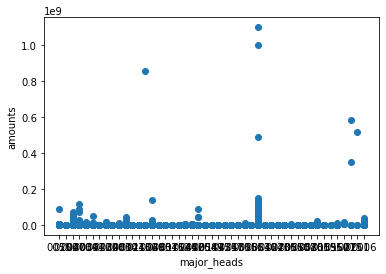

In [77]:
plt.scatter(data.major_head,data.amount)
plt.xlabel('major_heads')
plt.ylabel('amounts')
plt.show()


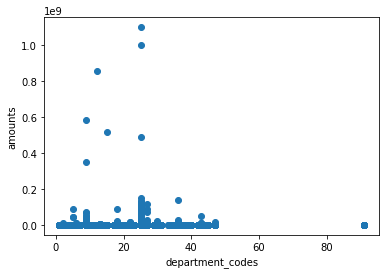

In [78]:
plt.scatter(data.dept_code,data.amount)
plt.xlabel('department_codes')
plt.ylabel('amounts')
plt.show()


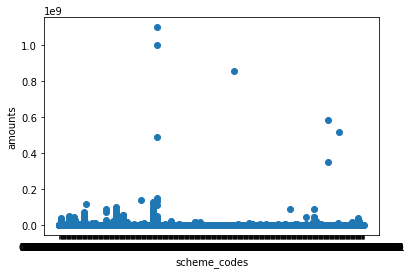

In [79]:
plt.scatter(data.scheme_code,data.amount)
plt.xlabel('scheme_codes')
plt.ylabel('amounts')
plt.show()



In [80]:
dept_scheme

,dept_code,scheme_code,major_head
0,1,0216017000700,0216
1,1,0403001020100,0403
2,1,0403001020200,0403
3,1,0403001020300,0403
4,1,0403001020400,0403
...,...,...,...
999,51,7610008000400,7610
1000,51,7610008001300,7610
1001,52,0047008000100,0047
1002,91,0070608001700,0070
